In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib as mpl

In [5]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [6]:
mpl.rcParams['xtick.labelsize'] = 40
mpl.rcParams['ytick.labelsize'] = 40
mpl.rcParams['font.size'] = 40
mpl.rcParams['figure.figsize'] =  15,10
mpl.rcParams['axes.labelsize'] = 40
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['axes.linewidth'] = 2.5

In [12]:
data = []
with open('Data-GT/stock_3/all_results_use') as fs:
        for line in fs:
            temp = line.strip().split('\t')
            data.append(temp[1:])


In [13]:
data = np.array(data,dtype=np.float)

In [10]:
data.shape

(10, 7)

In [11]:
#data = np.loadtxt('Data-GT/Whitewine/results_to_plot',delimiter='\t')\n",
data = np.loadtxt('Data-GT/MNIST/all_results_use',delimiter='  ')

In [14]:
data.shape

(10, 7)

In [16]:
labels = []
with open('Data-GT/stock_3/all_labels') as fs:
    for line in fs:
        labels.append(line.strip())

In [17]:
labels

['l1AP', 'l1AV', 'l1CO', 'l1KM', 'l1SI', 'l2AV', 'l2CO', 'l2KM', 'l2SI', 'SP']

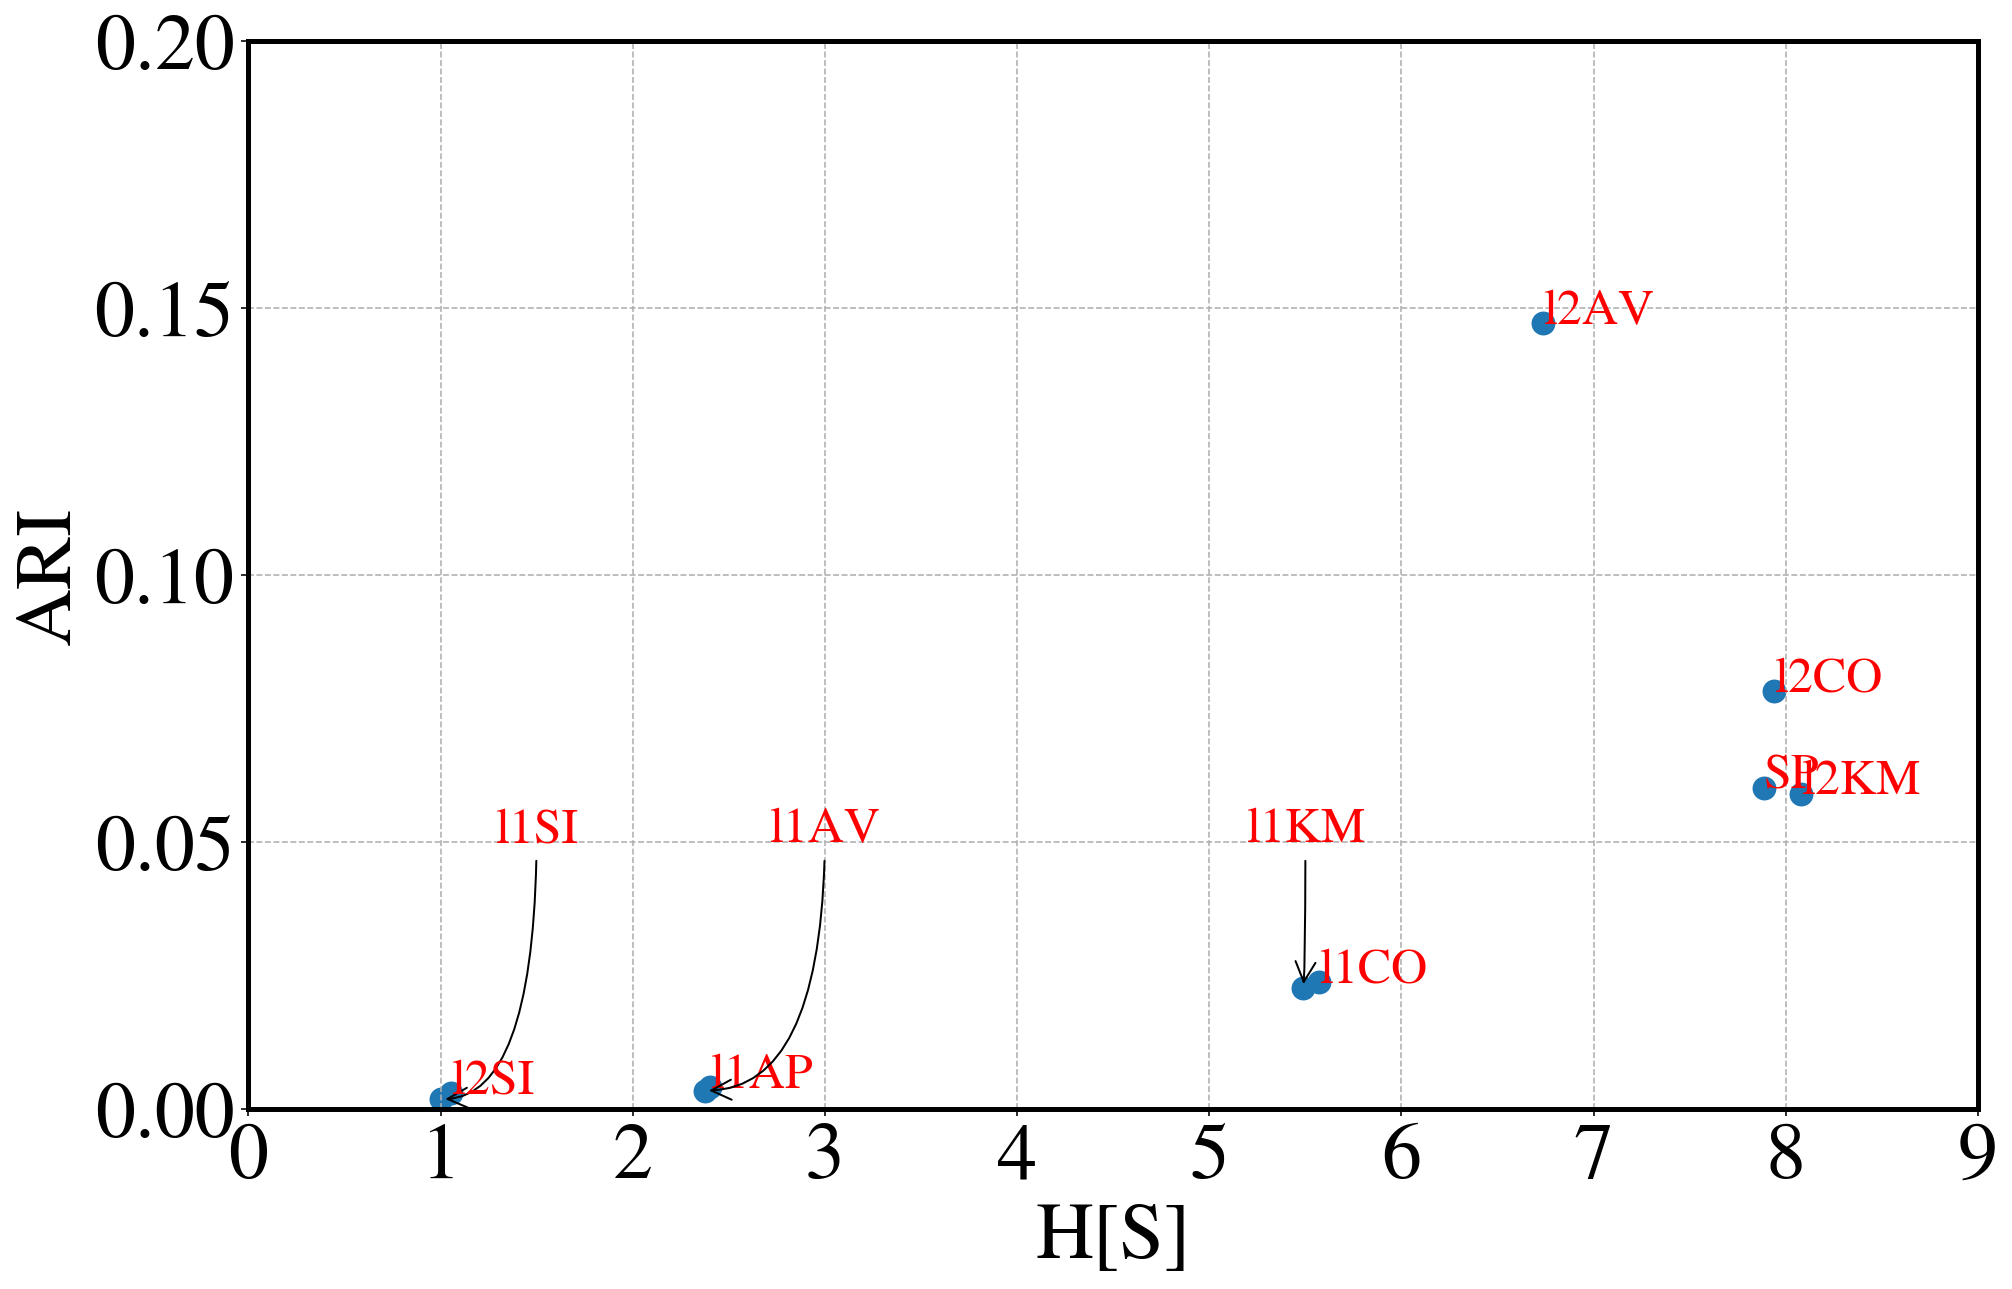

In [20]:
fig, ax = plt.subplots()
plt.grid(linestyle='--')

plt.ylim(0,0.2)
y_pos = np.arange(0,0.25,step = 0.05)
ax.set_yticks(y_pos)
plt.xlim(0,9)
x_pos = np.arange(0,10,step = 1)
ax.set_xticks(x_pos)
plt.ylabel('ARI')
plt.xlabel('H[S]')
ax.scatter(data[:,0],data[:,4],s=120)
target_location = [(0,0),(3,0.05),(4.2,0.29),(5.5,0.05),(1.5,0.05),(0,0),(4.2,0.25),(5.5,0.05),(7.5,0.7),(1.5,0.2),0,(6.5,0.2)]
for i, txt in enumerate(labels):
    if 'l2SI' in txt or 'AP' in txt or 'SP' in txt or 'CO' in txt or 'l2AV' in txt or 'l2KM' in txt or 'BI' in txt:
        ax.annotate(txt, (data[i,0], data[i,4]), color='r', fontsize=25)
    else:
            ax.annotate(txt, (data[i,0], data[i,4]), target_location[i],
                       arrowprops=dict(arrowstyle="->", connectionstyle="angle3", lw=1),
                       color='r', fontsize=25, ha='center')

plt.tight_layout()
plt.savefig('Plots_new/stock_3_ARI.pdf',dpi=200)    

In [21]:
from matplotlib.lines import Line2D

In [22]:
custom_lines = [Line2D([0], [0], color='r', lw=2),
            Line2D([0], [0], color='b', lw=2)]

In [23]:
target_location= [0 for _ in range(24)]
target_location[0] = (0.2,0.05)
target_location[1] = (0.5,0.05)
target_location[2] = (1,-0.025)
target_location[3] = (1,0)
#target_location[4] = (2.5,0.9)
#target_location[5] = (2.2,0.5)
target_location[10] = (2,0.1)
target_location[11] = (1.5,0.10)
target_location[12] = (2.5,0.1)
target_location[13] = (2,0.1)
#target_location[14] = (2.5,0.5)
#target_location[15] = (2.7,0.5)
#target_location[21] = (2.9,0.5)
#target_location[17] = (3.8,0.5)
#target_location[16] = (3.8,0.6)
#target_location[18] = (3.5,0.6)
#target_location[9] = (2.8,0.9)

In [ ]:
fig, ax = plt.subplots()
majorLocator = MultipleLocator(1)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(0.1)

ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(linestyle='--')

plt.ylim(-0.05,0.2)
y_pos = np.arange(-0.05,0.25,step = 0.05)
ax.set_yticks(y_pos)
plt.xlim(0,5)
x_pos = np.arange(0,6,step = 1)
#print(x_pos)\n",
ax.set_xticks(x_pos)
plt.ylabel('ARI')
plt.xlabel('H[S]')
ax.legend(custom_lines, ['neighborhood', 'shortest path'],loc = 'upper left',fontsize=35)
ax.scatter(data[:,0],data[:,4],s=150,marker='h',color='k')

for i, txt in enumerate(labels):
    if 'sp' in txt:
        if 'AVx' in txt or 'AP' in txt:\n",
            ax.annotate(txt.replace('sp',''), (data[i,0], data[i,4]), target_location[i],
                        arrowprops=dict(arrowstyle="-", connectionstyle="angle3", lw=1),
                        color='b', fontsize=25, ha='center')
        else:
            ax.annotate(txt.replace('sp',''), (data[i,0], data[i,4]), color='b', fontsize=25)
    else:
        if 'AV' in txt or 'AP' in txt:
            ax.annotate(txt.replace('no',''), (data[i,0], data[i,4]), target_location[i],
                        arrowprops=dict(arrowstyle="-", connectionstyle="angle3", lw=1),
                        color='r', fontsize=25, ha='center')
        else:
            ax.annotate(txt.replace('no',''), (data[i,0], data[i,4]), color='r', fontsize=25)
        #ax.annotate(txt.replace('no',''), (data[i,0], data[i,2]), color='r', fontsize=25)\n",

plt.tight_layout()
plt.savefig('Plots_new/rail_ARI.pdf',dpi=200)

In [24]:
H_sig = [0.34, 0.52, 0.47, 0.16, 0.15, 0.62, 0.28, 0.45, 0.47, 0.42, 0.56, 0.30, 0.33, 0.41, 0.18]
H_s = [0.65, 0.62, 0.89, 0.56, 0.53, 0.76, 0.52, 0.70, 0.82, 0.79, 0.91, 0.75, 0.85, 0.78, 0.82]

In [ ]:
fig, ax = plt.subplots()
majorLocator = MultipleLocator(1)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(0.1)

#ax.xaxis.set_major_locator(majorLocator)\n",
#ax.xaxis.set_major_formatter(majorFormatter)\n",
#ax.xaxis.set_minor_locator(minorLocator)\n",
plt.grid(linestyle='--')

plt.xlim(0.1,0.6)
x_pos = np.arange(0.1,0.7,step = 0.1)
#print(x_pos)\n",
ax.set_xticks(x_pos)

plt.ylim(0.4,1.0)
y_pos = np.arange(0.4,1.2,step = 0.2)
ax.set_yticks(y_pos)

plt.xlabel(r'H($\sigma$)/log M')
plt.ylabel(r'H[S]-Majority($\tau$, $\rho$)')

ax.scatter(H_sig,H_s,s=100)

plt.tight_layout()
plt.savefig('plots/summary.pdf',dpi=200)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
from sklearn.metrics import r2_score

In [27]:
H_sig = [0.34, 0.52, 0.47, 0.16, 0.15, 0.62, 0.28, 0.45, 0.47, 0.42, 0.56, 0.30, 0.33, 0.41, 0.18]
H_s = [0.65, 0.62, 0.89, 0.56, 0.53, 0.76, 0.52, 0.70, 0.82, 0.79, 0.91, 0.75, 0.85, 0.78, 0.82]

In [28]:
H_sig = np.array(H_sig)
H_sig = H_sig.reshape(-1,1)

In [29]:
H_s = np.array(H_s)

In [30]:
reg = LinearRegression().fit(H_sig, H_s)

In [31]:
reg.score(H_sig, H_s)

0.25284825993460835

In [33]:
pred = reg.predict(H_sig[10:])

In [34]:
H_s[10:]

array([0.91, 0.75, 0.85, 0.78, 0.82])

In [35]:
r2_score(H_s[10:],pred)

-3.2214191474007885

In [36]:
import random

In [39]:
Data = [(0.34,0.85,0.65),(0.52,0.98,0.62),(0.47,0.89,0.89),(0.16,0.66,0.56),(0.15,0.65,0.53),(0.62,1.0,0.76),
       (0.28,0.82,0.52),(0.45,0.74,0.70),(0.47,0.70,0.82),(0.42,0.82,0.79),(0.56,0.81,0.91),(0.30,0.61,0.75),
       (0.33,0.66,0.85),(0.41,0.76,0.78),(0.18,0.90,0.82)]

In [40]:
random.shuffle(Data)

In [41]:
def traintestSplit(Data, both=True):
    random.shuffle(Data)
    train, test = Data[:10], Data[10:]
    train_x = np.array([[r[0],r[1]] if both else [r[0]] for r in train])
    train_y = np.array([r[2] for r in train])
    test_x = np.array([[r[0],r[1]] if both else [r[0]] for r in test])
    test_y = np.array([r[2] for r in test])
    return train_x,train_y,test_x,test_y

In [42]:
scores = []
for _ in range(20):
    train_x,train_y,test_x,test_y = traintestSplit(Data, both=True)
    reg = LinearRegression().fit(train_x, train_y)
    scores.append(reg.score(train_x,train_y))
print(sum(scores)/len(scores))

0.3459849448956275


In [ ]:
fig, ax = plt.subplots()
majorLocator = MultipleLocator(1)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(0.1)

ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(linestyle='--')

plt.ylim(-0.05,0.2)
y_pos = np.arange(-0.05,0.25,step = 0.05)
ax.set_yticks(y_pos)
plt.xlim(0,5)
x_pos = np.arange(0,6,step = 1)
#print(x_pos)\n",
ax.set_xticks(x_pos)
plt.ylabel('ARI')
plt.xlabel('H[S]')
ax.legend(custom_lines, ['neighborhood', 'shortest path'],loc = 'upper left',fontsize=35)
ax.scatter(data[:,0],data[:,4],s=150,marker='h',color='k')

for i, txt in enumerate(labels):
    if 'sp' in txt:
        ax.annotate(txt.replace('sp',''), (data[i,0], data[i,4]), color='b', fontsize=25)
    else:

        ax.annotate(txt.replace('no',''), (data[i,0], data[i,4]), color='r', fontsize=25)
        #ax.annotate(txt.replace('no',''), (data[i,0], data[i,2]), color='r', fontsize=25)\n",

plt.tight_layout()
plt.savefig('Plots_new/rail_ARI.pdf',dpi=200
fig = plt.figure()